In [4]:
# import and activate packages
import Pkg
Pkg.activate(".")

  Activating project at `~`


In [5]:
# add in the relevant libraries
Pkg.add(["Random","LinearAlgebra","Plots","Distributions"])

   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`


In [126]:
# bring these libraries into the namespace
using Random, LinearAlgebra, Plots, Distributions

In [131]:
# generate a normal distribution to start (Mean of 0, stdev of 1)
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [132]:
# randomly select a set of 1000 points as 1000 x and y value pairs
data = rand(nd,1000,2)

1000×2 Matrix{Float64}:
 -0.376889  -1.00689
 -1.20486   -0.107198
  0.467017  -1.2655
 -0.108854   0.408777
 -0.267745   0.445189
 -0.521701  -1.188
 -1.73658   -0.656132
  0.853071  -1.02631
 -1.24773    0.30618
  1.50424    0.880325
  0.405953   0.601469
  2.60201    0.896431
  0.998995  -0.955231
  ⋮         
 -0.872051  -0.11461
  0.535488  -2.40683
 -0.194916  -0.816753
 -0.141623   0.253195
  1.89134    0.214033
  0.674341   0.253837
 -0.93057    0.27831
 -0.688039  -0.0322416
  0.201127   0.311136
  0.797647  -0.699309
 -1.7236    -0.244364
 -0.411637  -1.87867

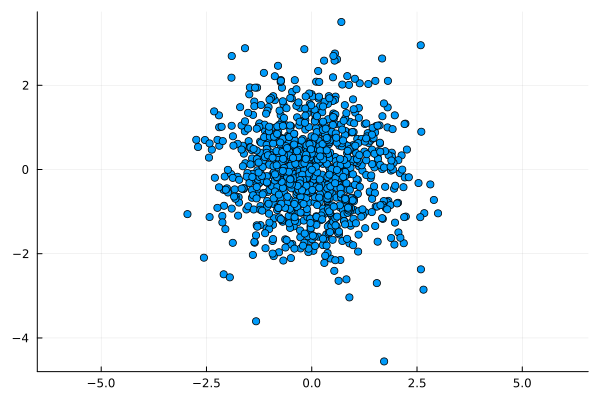

In [133]:
# graph the data as a scatter plot, where the first column is the x values, and the second column the y
# scatter function takes an input of x,y
# for readability, no legend is made and an equal aspect ratio is locked
scatter(data[:,1],data[:,2],legend=nothing,aspect_ratio=:equal)

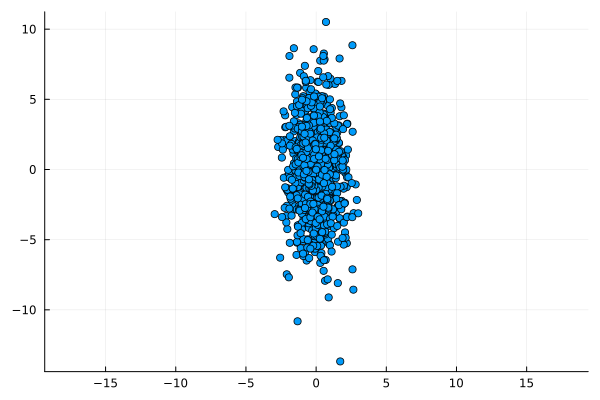

In [134]:
# elongation step

# copy of previous matrix
data_s = copy(data)

#stretch the data following the same vertical elongation from class
data_s[:,2] = data[:,2]*3

scatter(data_s[:,1],data_s[:,2],legend=nothing,aspect_ratio=:equal)

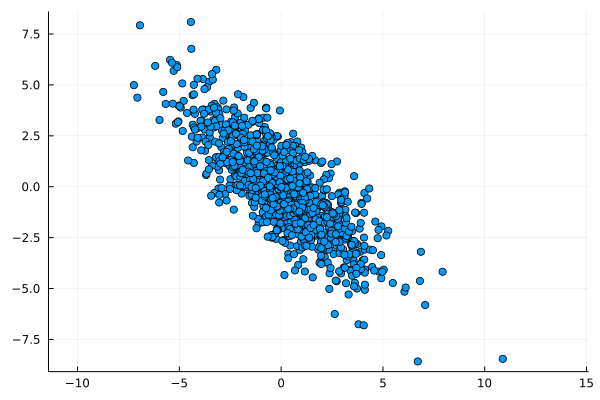

In [135]:
# rotate the matrix by multiplying by a rotation matrix r

# define an angle of rotation, ex: 45º
θ = π/4

# the rotation matrix for a given angle theta takes the following form
R = [cos(θ) -sin(θ); sin(θ) cos(θ)]

# rotate the stretched data 
# this form of the rotation matrix is intended for the linear form A_rotated = R*A
# however data_s has dimention 1000X2,and to multiply in the order R A, must transpose data_s

# data_s has dimensions 1000X2
# data_s' has dimension 2X1000
# R has dimensions 2X2
# R * data_s'
# 2X2 2x1000 ==> 2x1000
# can return back to typical orientation by transposing output (R*data_s')'

# alternatively using a property of transpose:
# rule: (AB)' = B'* A'
# applied: (RA')' = A''* R' = AR'

data_r =data_s * R'

# graph the rotation and see the expected π/4 rotation CCW
scatter(data_r[:,1],data_r[:,2],legend=nothing,aspect_ratio=:equal)

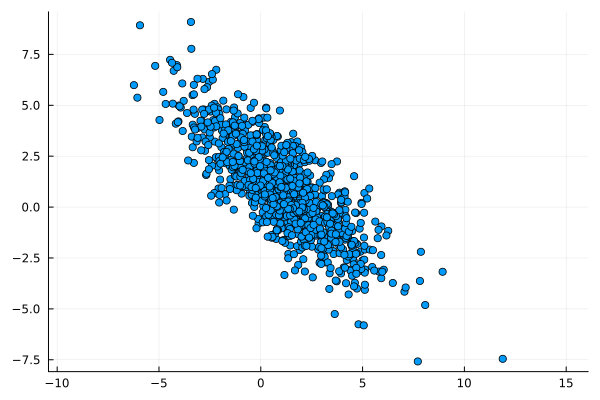

In [136]:
# translate
Δx = 1
Δy = 1

#Copy of data to initiate the matrix
data_t = copy(data_r)

# add delta x to the first column (x-values)
data_t[:,1] = data_r[:,1] .+ Δx

# add delta y to the second column (y-values)
data_t[:,2] = data_r[:,2] .+ Δy

# view the results
scatter(data_t[:,1],data_t[:,2],legend=nothing,aspect_ratio=:equal)

In [148]:
# subtract means from x and y for use in PCA analysis
μx = mean(data_t[:,1])
μy = mean(data_t[:,2])

data_sub = copy(data_t)
data_sub[:,1] = data_t[:,1].-μx
data_sub[:,2] = data_t[:,2].-μy

1000-element Vector{Float64}:
 -2.3470783180179677
 -1.0240199106985206
 -2.2989469492436534
  0.8455237340589009
  0.8104124088533319
 -2.833675403367079
 -2.5644650166677865
 -1.5185728459525252
 -0.17742515048077212
  2.9864621355751675
  1.6183088340560823
  3.7968646575000156
 -1.2646065424251338
  ⋮
 -0.8044087968551394
 -4.671661898443539
 -1.815071749020933
  0.49231337071142744
  1.8467602190662182
  1.0706491034475234
 -0.012279370846763449
 -0.49956287406093014
  0.8575857328012993
 -0.8640880866547306
 -1.6817977951565588
 -4.220981115354246

In [54]:
# apply the PCA using SVD
u,s,vt = svd(data_sub/sqrt(1000))

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
1000×2 Matrix{Float64}:
 -0.0411676    0.0082743
  0.00277649  -0.0536556
  0.0619687    0.0248172
  0.00745615  -0.0212422
  0.0441603   -0.0202869
 -0.0238473   -0.00787409
  0.0227086    0.0230105
 -0.00778386   0.0537665
 -0.0114809   -0.00952931
 -0.00314305  -0.0054559
  0.0103732    0.0339044
  0.0118891    0.0231493
  0.0330631   -0.0331598
  ⋮           
 -0.0885333    0.0627364
  0.0193462   -0.0233197
  0.0406679   -0.0314515
  0.00419938  -0.0611317
  0.00358966  -0.0338668
  0.00150284   0.0264728
 -0.0358634   -0.00377346
  0.0362345    0.00797697
 -0.0456232   -0.00486418
  0.0323034    0.031195
 -0.0237578   -0.0573878
 -0.0198549    0.0138191
singular values:
2-element Vector{Float64}:
 2.88576968132781
 0.990279515413692
Vt factor:
2×2 Matrix{Float64}:
 -0.708584   0.705627
 -0.705627  -0.708584

In [121]:
# Plot the original distribution and add ellipses at one sigma, 
# two sigma and three sigma.  Also indicate the principal direction 
# of the two singular values/variances.

# define a set of points to cycle from 0-2pi then calc std
theta = (0:0.01:1).*(2*pi)
std = [cos.(theta) sin.(theta)]*Diagonal(s)*v'

101×2 Matrix{Float64}:
 -2.04481  2.03628
 -2.08465  1.9882
 -2.11626  1.93227
 -2.13953  1.86872
 -2.15434  1.7978
 -2.16066  1.71978
 -2.15845  1.63497
 -2.14772  1.54371
 -2.12851  1.44636
 -2.10091  1.3433
 -2.06501  1.23494
 -2.02096  1.1217
 -1.96894  1.00404
  ⋮        
 -1.13014  2.01626
 -1.24356  2.05983
 -1.35207  2.09527
 -1.45525  2.12245
 -1.55268  2.14125
 -1.64398  2.15159
 -1.7288   2.15345
 -1.80679  2.14681
 -1.87765  2.13169
 -1.94111  2.10817
 -1.9969   2.07632
 -2.04481  2.03628

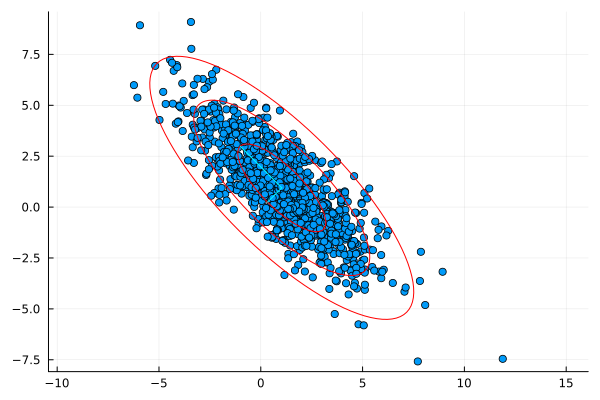

In [149]:
# plot original data
scatter(data_t[:,1],data_t[:,2],legend=nothing,aspect_ratio=:equal);

# plot the σ1,σ2,σ3
plot!(μx.+1*std[:,1], μy.+ 1*std[:,2], lc = :red)
plot!(μx.+2*std[:,1], μy.+ 2*std[:,2], lc = :red)
plot!(μx.+3*std[:,1], μy.+ 3*std[:,2], lc = :red)

# plot the PCs as line segments with mean as starting point, define endpoints here (σv + mean)
x2_pc1 = s[1]*v[1,2] + μx 
y2_pc1 = s[1]*v[2,1] + μy 

x2_pc2 = s[2]*v[1,2] + μx 
y2_pc2 = s[2]*v[2,2] + μy

# graph segements with syntax plot!([x1,x2],[y1,y2])
plot!([μx,x2_pc1],[μy,y2_pc1],lc = :cyan)
plot!([μx,x2_pc2],[μy,y2_pc2],lc = :cyan)